In [1]:
%matplotlib inline
import numpy as np
import math
import random
import pyJHTDB
import matplotlib.pyplot as plt

N = 3
T = pyJHTDB.dbinfo.channel['time'][-1]
time = np.random.random()*T

spatialInterp  = 6  # 6 point Lagrange
temporalInterp = 0  # no time interpolation
FD4Lag4        = 44 # 4 point Lagrange interp for derivatives

# mhdc has starttime .364 and endtime .376
startTime = time
endTime = startTime + 0.012
lag_dt = 0.0004

# Select points in the database to query
lpoints = []
for i in range(0,N):
    lpoints.append([random.uniform(0, 8*3.14),random.uniform(-1, 1),random.uniform(0, 3*3.14)])

# 2D array with single precision values
points = np.array(lpoints,dtype='float32')

In [2]:
# load shared library
lTDB = pyJHTDB.libJHTDB()
#initialize webservices
lTDB.initialize()

#Add token
auth_token  = "edu.jhu.pha.turbulence.testing-201311"
lTDB.add_token(auth_token)

print('Coordinates of {0} points where variables are requested:'.format(N))
for p in range(N):
    print('{0}: {1}'.format(p, points[p]))
print('Data is requested at time {0}'.format(time))

Coordinates of 3 points where variables are requested:
0: [12.275034   -0.18202879  2.8714983 ]
1: [ 4.5582104 -0.4912433  4.5832806]
2: [ 0.5536995  -0.12273846  6.2892604 ]
Data is requested at time 9.220573925939384


In [3]:
print('Requesting velocity at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getVelocity')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting velocity at 3 points...
0: [ 1.0394543   0.05348268 -0.03882305]
1: [ 1.101364   0.0068796 -0.0962548]
2: [ 1.0497521   0.01329705 -0.04538481]


In [4]:
print('Requesting pressure at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getPressure')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting pressure at 3 points...
0: [0.00228134]
1: [-0.00255303]
2: [0.00229256]


In [5]:
print('Requesting velocity and pressure at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getVelocityAndPressure')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting velocity and pressure at 3 points...
0: [ 1.0394543   0.05348268 -0.03882305  0.00228134]
1: [ 1.101364    0.0068796  -0.0962548  -0.00255303]
2: [ 1.0497521   0.01329705 -0.04538481  0.00229256]


In [6]:
print('Requesting velocity gradient at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp,data_set ='channel',
        getFunction = 'getVelocityGradient')
for p in range(N):
    print('{0}: '.format(p) +
          'duxdx = {0:+e}, duxdy = {1:+e}, duxdz = {2:+e}\n   '.format(result[p][0], result[p][1], result[p][2]) +
          'duydx = {0:+e}, duydy = {1:+e}, duydz = {2:+e}\n   '.format(result[p][3], result[p][4], result[p][5]) +
          'duzdx = {0:+e}, duzdy = {1:+e}, duzdz = {2:+e}'.format(result[p][6], result[p][7], result[p][8]))

Requesting velocity gradient at 3 points...
0: duxdx = -9.084952e-01, duxdy = +1.890021e+00, duxdz = -1.183712e+00
   duydx = +5.642843e-01, duydy = +6.009388e-01, duydz = -1.817549e-01
   duzdx = -1.945825e+00, duzdy = +1.122349e+00, duzdz = +3.722340e-01
1: duxdx = +1.150598e+00, duxdy = -1.164918e-01, duxdz = +1.586468e-01
   duydx = +1.033164e+00, duydy = +5.892582e-01, duydz = +3.146745e-02
   duzdx = -3.011075e-01, duzdy = -4.053348e-01, duzdz = -1.840708e+00
2: duxdx = -1.643215e-01, duxdy = +8.070632e-01, duxdz = -5.509958e-01
   duydx = -4.359578e-02, duydy = +5.414938e-01, duydz = +1.371928e-01
   duzdx = +1.257534e-01, duzdy = -9.327584e-02, duzdz = -3.685361e-01


In [7]:
print('Requesting velocity hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',sinterp = FD4Lag4, tinterp = temporalInterp,
                      getFunction = 'getVelocityHessian')

for p in range(N):
        print('{0}: '.format(p) +
              'd2uxdxdx = {0:+e}, d2uxdxdy = {1:+e}, d2uxdxdz = {2:+e}\n   '.format(result[p][ 0], result[p][ 1], result[p][ 2])
            + 'd2uxdydy = {0:+e}, d2uxdydz = {1:+e}, d2uxdzdz = {2:+e}\n   '.format(result[p][ 3], result[p][ 4], result[p][ 5])
            + 'd2uydxdx = {0:+e}, d2uydxdy = {1:+e}, d2uydxdz = {2:+e}\n   '.format(result[p][ 6], result[p][ 7], result[p][ 8])
            + 'd2uydydy = {0:+e}, d2uydydz = {1:+e}, d2uydzdz = {2:+e}\n   '.format(result[p][ 9], result[p][10], result[p][11])
            + 'd2uzdxdx = {0:+e}, d2uzdxdy = {1:+e}, d2uzdxdz = {2:+e}\n   '.format(result[p][12], result[p][13], result[p][14])
            + 'd2uzdydy = {0:+e}, d2uzdydz = {1:+e}, d2uzdzdz = {2:+e}'.format(result[p][15], result[p][16], result[p][17]))
        

Requesting velocity hessian at 3 points...
0: d2uxdxdx = +1.477101e+02, d2uxdxdy = -7.449274e+01, d2uxdxdz = +2.720334e+01
   d2uxdydy = +9.508621e+01, d2uxdydz = -3.678998e+01, d2uxdzdz = +1.857212e+01
   d2uydxdx = +1.028199e+02, d2uydxdy = -8.043756e+01, d2uydxdz = +4.160887e+01
   d2uydydy = +8.234856e+01, d2uydydz = -3.218481e+01, d2uydzdz = +8.426526e+00
   d2uzdxdx = -7.741961e+01, d2uzdxdy = +5.430247e+01, d2uzdxdz = -4.103383e+01
   d2uzdydy = -4.464788e+01, d2uzdydz = +2.795933e+01, d2uzdzdz = -6.790544e+00
1: d2uxdxdx = -8.792870e+00, d2uxdxdy = -8.721898e+00, d2uxdxdz = -4.654806e+01
   d2uxdydy = +5.641722e+00, d2uxdydz = -2.247151e+01, d2uxdzdz = -1.323158e+02
   d2uydxdx = +4.428915e+01, d2uydxdy = +1.867237e+01, d2uydxdz = +5.615274e+01
   d2uydydy = +3.301577e+01, d2uydydz = +3.372994e+01, d2uydzdz = +7.059734e+01
   d2uzdxdx = +1.125546e+02, d2uzdxdy = -5.479741e+01, d2uzdxdz = -5.593783e+00
   d2uzdydy = +2.232343e+01, d2uzdydz = -2.578267e+01, d2uzdzdz = +3.352518e+

In [8]:
print('Requesting velocity laplacian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getVelocityLaplacian')
for p in range(N):
    print('{0}: '.format(p) +
          'grad2ux = {0:+e}, grad2uy = {1:+e}, grad2uz = {2:+e}, '.format(result[p][0], result[p][1], result[p][2]))

Requesting velocity laplacian at 3 points...
0: grad2ux = +2.613684e+02, grad2uy = +1.935950e+02, grad2uz = -1.288580e+02, 
1: grad2ux = -1.354669e+02, grad2uy = +1.479023e+02, grad2uz = +1.382305e+02, 
2: grad2ux = +2.126599e+01, grad2uy = -2.170470e+01, grad2uz = -1.402285e+01, 


In [9]:
print('Requesting pressure gradient at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getPressureGradient')
for p in range(N):
    print('{0}: '.format(p)
        + 'dpdx = {0:+e}, dpdy = {1:+e}, dpdz = {2:+e}, '.format(result[p][0], result[p][1], result[p][2]))

Requesting pressure gradient at 3 points...
0: dpdx = -1.361227e-02, dpdy = -3.560819e-03, dpdz = -3.492434e-03, 
1: dpdx = -1.159563e-01, dpdy = -1.056665e-02, dpdz = -9.930148e-02, 
2: dpdx = +3.369567e-03, dpdy = -9.156719e-03, dpdz = -7.902017e-03, 


In [10]:
print('Requesting pressure hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getPressureHessian')
for p in range(N):
    print('{0}: '.format(p) +
          'd2pdxdx = {0:+e}, d2pdxdy = {1:+e}, d2pdxdz = {2:+e}\n   '.format(result[p][0], result[p][1], result[p][2])
        + 'd2pdydy = {0:+e}, d2pdydz = {1:+e}, d2pdzdz = {2:+e}'.format(result[p][3], result[p][4], result[p][5]))

Requesting pressure hessian at 3 points...
0: d2pdxdx = -4.292458e+00, d2pdxdy = +1.778570e+00, d2pdxdz = +3.895094e-01
   d2pdydy = -2.461130e+00, d2pdydz = +1.238730e+00, d2pdzdz = -1.360678e+00
1: d2pdxdx = -3.850385e+00, d2pdxdy = -7.787215e-01, d2pdxdz = -6.982353e+00
   d2pdydy = +1.183954e+00, d2pdydz = +1.822382e+00, d2pdzdz = -1.580497e+00
2: d2pdxdx = -2.437511e-01, d2pdxdy = +1.655175e-01, d2pdxdz = -7.981264e-02
   d2pdydy = -2.878984e-01, d2pdydz = -1.264311e-01, d2pdzdz = +3.037848e-01


In [11]:
result = lTDB.getThreshold(
            data_set = 'channel',
            field = 'vorticity',
            time = 0,
            threshold = 0.0,
            cx = 0, cy = 0, cz = 0,
            nx = 4, ny = 4, nz = 4,
            sinterp = 40,
            tinterp = 0)
for p in range(N):
    print('{0}: '.format(p)
        + 'i_x = {0}, i_y = {1}, i_z = {2}, value = {3} '.format(result[p][0], result[p][1], result[p][2],result[p][3]))

0: i_x = 3, i_y = 3, i_z = 1, value = 65.96614837646484 
1: i_x = 3, i_y = 2, i_z = 1, value = 65.83401489257812 
2: i_x = 3, i_y = 1, i_z = 1, value = 65.75108337402344 


In [12]:
result = lTDB.getRawData(
            time,
            start = np.array([0, 0, 0], dtype = np.int),
            size  = np.array([8, 8, 8], dtype = np.int),
            data_set = 'channel',
            getFunction = 'Pressure')
print(result)

[[[[-0.00486196]
   [-0.00508439]
   [-0.00514844]
   [-0.00508386]
   [-0.00489358]
   [-0.00458291]
   [-0.00415304]
   [-0.00363229]]

  [[-0.00486198]
   [-0.00508442]
   [-0.00514847]
   [-0.00508387]
   [-0.00489356]
   [-0.00458287]
   [-0.00415296]
   [-0.00363217]]

  [[-0.00486204]
   [-0.00508449]
   [-0.00514853]
   [-0.00508389]
   [-0.00489352]
   [-0.00458275]
   [-0.00415277]
   [-0.00363191]]

  [[-0.00486212]
   [-0.00508461]
   [-0.00514863]
   [-0.00508391]
   [-0.00489344]
   [-0.00458255]
   [-0.00415244]
   [-0.00363145]]

  [[-0.00486224]
   [-0.00508476]
   [-0.00514875]
   [-0.00508392]
   [-0.00489329]
   [-0.00458224]
   [-0.00415194]
   [-0.00363076]]

  [[-0.00486236]
   [-0.00508493]
   [-0.00514886]
   [-0.00508388]
   [-0.00489304]
   [-0.00458178]
   [-0.00415123]
   [-0.0036298 ]]

  [[-0.00486246]
   [-0.00508508]
   [-0.00514892]
   [-0.00508375]
   [-0.00489264]
   [-0.00458112]
   [-0.00415026]
   [-0.00362852]]

  [[-0.00486249]
   [-0.00508515]


In [13]:
x, t = lTDB.getPosition(
    starttime = 0.1,
    endtime = 0.2,
    dt = 0.01,
    data_set = 'channel',
    point_coords = points[0:1,:],
    steps_to_keep = 10)
print(x)

starting integration loop, dataset is  channel
at time step 1 out of 10
got next position for time step 1
at time step 2 out of 10
got next position for time step 2
at time step 3 out of 10
got next position for time step 3
at time step 4 out of 10
got next position for time step 4
at time step 5 out of 10
got next position for time step 5
at time step 6 out of 10
got next position for time step 6
at time step 7 out of 10
got next position for time step 7
at time step 8 out of 10
got next position for time step 8
at time step 9 out of 10
got next position for time step 9
at time step 10 out of 10
got next position for time step 10
[[[12.275034   -0.18202879  2.8714983 ]]

 [[12.287029   -0.18195482  2.871027  ]]

 [[12.299027   -0.18189186  2.8705597 ]]

 [[12.3110285  -0.18183997  2.8700962 ]]

 [[12.32303    -0.18179868  2.869637  ]]

 [[12.335035   -0.18176839  2.869182  ]]

 [[12.347041   -0.18174854  2.8687313 ]]

 [[12.35905    -0.1817394   2.8682847 ]]

 [[12.37106    -0.1817407

In [14]:
t1 = np.linspace(0, 4*3.14, 64)
t2 = np.linspace(-1, 1, 64)
x = np.zeros((t1.shape[0], t2.shape[0], 3), np.float32)
x[:, :, 0] = t1[np.newaxis, :]
x[:, :, 1] = t2[:, np.newaxis]
x[:, :, 2] = .0

In [15]:
T = pyJHTDB.dbinfo.channel['time'][-1]
time = np.random.random()*T
u = lTDB.getData(
               time,
               x,
               data_set = 'channel',
               sinterp = 4,
               getFunction='getVelocity')

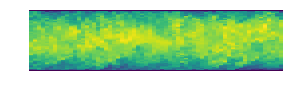

In [16]:
e = np.sum(u**2, axis = 2)
fig = plt.figure(figsize = (10, 5))
a = fig.add_subplot(121)
a.set_axis_off()
a.imshow(e,
         extent = [t1[0], t1[-1] - t1[0], t2[0], t2[-1] - t2[0]],
         interpolation = 'none')

In [17]:
lTDB.finalize()